In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
df = pd.read_csv('/content/drive/MyDrive/IDSIA Biomedical Texts/AllSource_Intensity_ThirdJuly.csv', low_memory=False)
df.head(1)

,urls,text,source,label,WC,Analytic,Clout,Authentic,Tone,WPS,...,all_emo_labels,all_emo_label_rank,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity
0,https://www.quora.com/What-are-panic-attacks-l...,i have been dealing with these for quite some ...,Quora,1,607,55.22,35.35,48.82,1.0,26.39,...,"['fear', 'nervousness', 'confusion', 'curiosit...","{'fear': 1, 'nervousness': 2, 'confusion': 3, ...",0.415048,0.553423,0.272333,0.568205,0.4095,0.467625,0.4345,0.522773


In [5]:
df[['source','label']].value_counts()

source                 label
www.nomorepanic.co.uk  1        3815
Beyond Blue Forums     0        1040
Quora                  0         978
                       1         578
anxietycommunity       0         489
Reddit                 0         258
                       1         247
dtype: int64

In [6]:
df[['label']].value_counts()

label
1        4640
0        2765
dtype: int64

In [7]:
df[df['source'] == 'Reddit']['label'].value_counts()

0    258
1    247
Name: label, dtype: int64

In [8]:
df[df['source'] == 'Quora']['label'].value_counts()

0    978
1    578
Name: label, dtype: int64

## Getting 2 panic features

In [9]:
import regex as re

In [10]:
panic_symptoms = ["Palpitations", "Pounding heart", "Accelerated heart rate", "Sweating", "Trembling", "Shaking", "Shortness of breath",
"Smothering", "Feelings of choking", "Chest pain", "Discomfort", "Abdominal distress", "Nausea", "Dizziness", "Unsteadiness", "Lightheadedness",
"Faintness", "Chills", "Heat flashes", "Paresthesia", "Numbness", "Tingling sensations", "Derealization", "Depersonalization", "Fear of losing control",
"Fear of going crazy", "Fear of dying", "Mental images of dying", "Mental images of collapsing", "Agoraphobia", "Need to escape"]


panic_symptoms_ext = ["Palpitations", "Pounding heart", "Accelerated heart rate", "Sweating", "Trembling", "Shaking", "Shortness of breath",
"Smothering", "Feelings of choking", "Chest pain", "Discomfort", "Abdominal distress", "Nausea", "Dizziness", "Unsteadiness", "Lightheadedness",
"Faintness", "Chills", "Heat flashes", "Paresthesia", "Numbness", "Tingling sensations", "Derealization", "Depersonalization", "Fear of losing control",
"Fear of going crazy", "Fear of dying", "Mental images of dying", "Mental images of collapsing", "Agoraphobia", "Need to escape"
"Sweat", "Tremble", "Shake", "Shortage of breath","Feeling of choking","Dizzy",
"Faint","Fainted","Chill","Heat flash", "Numb", "Tingling sensation","Mental image of dying", "Mental image of collapsing"]

In [11]:
def count_symptoms_in_text(text, panic_list):
    if isinstance(text, str):
        count = 0
        for symptom in panic_list:
            match = re.search(r'\b{}\b'.format(symptom), text, re.IGNORECASE)
            if match:
                count += 1
        return count

In [12]:
df['symptoms_count'] = df['text'].apply(lambda x: count_symptoms_in_text(x,panic_symptoms))
df['symptoms_ext_count'] = df['text'].apply(lambda x: count_symptoms_in_text(x,panic_symptoms_ext))

In [13]:
pickle_in = open("/content/drive/MyDrive/IDSIA Biomedical Texts/Sentence Embeddings/AllSource_alldistilrobertav1_via_UMAP_SHORTembeddings.pickle", 'rb')
sentence_embeddings = pickle.load(pickle_in)
sentence_embeddings

array([[10.64194  ,  5.0430765,  5.6824026, ...,  4.9058275,  6.8707986,
         4.538727 ],
       [11.312859 ,  5.364349 ,  4.41365  , ...,  4.92234  ,  6.8475184,
         4.5590596],
       [10.531799 ,  4.894456 ,  5.387705 , ...,  4.8968716,  6.8360796,
         4.530069 ],
       ...,
       [10.346373 ,  4.4247556,  3.5815325, ...,  5.0401225,  6.552696 ,
         4.490976 ],
       [10.454275 ,  4.5640407,  3.6035635, ...,  5.0320673,  6.564847 ,
         4.4918733],
       [11.222271 ,  5.1468487,  4.0054016, ...,  5.079988 ,  6.6341186,
         4.5597043]], dtype=float32)

In [14]:
# Normalize sentence embeddings so that all values are between 0 and 1 (becasue emotions features are between 0 and 1 too)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1))  # (0,1) is default

In [15]:
sentence_embeddings = scaling.fit_transform(sentence_embeddings.reshape(-1, 1)).reshape(*sentence_embeddings.shape) # https://stackoverflow.com/questions/75461346/different-result-from-minmaxscaler-with-manual-calculations
sentence_embeddings

array([[0.8199141 , 0.35134387, 0.40484923, ..., 0.33985746, 0.5043063 ,
        0.30913472],
       [0.8760634 , 0.37823123, 0.298667  , ..., 0.3412394 , 0.502358  ,
        0.31083637],
       [0.81069636, 0.33890578, 0.3801859 , ..., 0.33910793, 0.5014007 ,
        0.30841014],
       ...,
       [0.795178  , 0.29959643, 0.22902691, ..., 0.35109666, 0.4776843 ,
        0.30513844],
       [0.80420834, 0.31125325, 0.2308707 , ..., 0.3504225 , 0.4787012 ,
        0.30521354],
       [0.8684821 , 0.3600286 , 0.26450062, ..., 0.354433  , 0.4844986 ,
        0.31089035]], dtype=float32)

In [16]:
sentence_embeddings.shape

(7405, 28)

In [17]:
# Standardization of LIWC features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
standardized_liwc = sc.fit_transform(df.loc[:, 'WC':'Emoji'])

In [19]:
# normalization of 2 panic features
normalized_panic_features = scaling.fit_transform(df[['symptoms_count', 'symptoms_ext_count']])

In [20]:
sentence_embeddings

array([[0.8199141 , 0.35134387, 0.40484923, ..., 0.33985746, 0.5043063 ,
        0.30913472],
       [0.8760634 , 0.37823123, 0.298667  , ..., 0.3412394 , 0.502358  ,
        0.31083637],
       [0.81069636, 0.33890578, 0.3801859 , ..., 0.33910793, 0.5014007 ,
        0.30841014],
       ...,
       [0.795178  , 0.29959643, 0.22902691, ..., 0.35109666, 0.4776843 ,
        0.30513844],
       [0.80420834, 0.31125325, 0.2308707 , ..., 0.3504225 , 0.4787012 ,
        0.30521354],
       [0.8684821 , 0.3600286 , 0.26450062, ..., 0.354433  , 0.4844986 ,
        0.31089035]], dtype=float32)

In [21]:
sentemb_column_names = ["sentemb" + str(i+1) for i in range(28)]

In [22]:
sentembdf = pd.DataFrame(sentence_embeddings, columns=sentemb_column_names)
sentembdf

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,sentemb19,sentemb20,sentemb21,sentemb22,sentemb23,sentemb24,sentemb25,sentemb26,sentemb27,sentemb28
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.494592,0.289889,0.115539,0.196822,0.428880,0.426222,0.362514,0.339857,0.504306,0.309135
1,0.876063,0.378231,0.298667,0.214494,0.349709,0.284757,0.438802,0.078256,0.026417,0.481356,...,0.536341,0.269954,0.126838,0.195539,0.443481,0.403223,0.353871,0.341239,0.502358,0.310836
2,0.810696,0.338906,0.380186,0.207599,0.268363,0.274065,0.500595,0.077948,0.052404,0.508967,...,0.497243,0.285798,0.115411,0.195277,0.431129,0.421081,0.363387,0.339108,0.501401,0.308410
3,0.875869,0.375439,0.291701,0.216481,0.355757,0.287865,0.434504,0.078305,0.024242,0.476598,...,0.540063,0.268896,0.127621,0.195539,0.443904,0.402204,0.353474,0.342344,0.501798,0.311278
4,0.849092,0.364154,0.345076,0.144952,0.283609,0.274024,0.446017,0.077871,0.052790,0.488757,...,0.520263,0.277368,0.124095,0.195726,0.446654,0.415476,0.357244,0.337169,0.496036,0.308303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.808676,0.343545,0.265276,0.106535,0.323924,0.292145,0.382246,0.077382,0.073316,0.436193,...,0.546514,0.260041,0.122214,0.197972,0.459927,0.397550,0.356333,0.341254,0.485487,0.303029
7401,0.824678,0.309808,0.225578,0.204305,0.355065,0.360845,0.426495,0.070627,0.067943,0.404500,...,0.546183,0.259894,0.116986,0.200168,0.441317,0.389815,0.363444,0.354721,0.477989,0.306945
7402,0.795178,0.299596,0.229027,0.193240,0.349450,0.343462,0.422839,0.070439,0.078386,0.409807,...,0.543561,0.260543,0.115634,0.199547,0.446306,0.389455,0.364519,0.351097,0.477684,0.305138
7403,0.804208,0.311253,0.230871,0.186933,0.347010,0.343995,0.420793,0.071775,0.076749,0.414172,...,0.544412,0.260857,0.116057,0.199328,0.447040,0.390905,0.364248,0.350423,0.478701,0.305214


In [23]:
standardized_liwc

array([[ 3.67802528,  0.98063234, -0.11115907, ...,  0.13908545,
        -0.12035728,  0.17485002],
       [ 2.12422261,  0.93614355, -1.01518881, ..., -0.32861383,
        -0.30797786, -0.05320853],
       [ 2.46364552, -0.16631989,  1.42946272, ...,  0.82624363,
        -0.23487893, -0.05320853],
       ...,
       [-0.75710077,  0.25671387, -0.96127635, ..., -0.86826685,
        -0.30797786, -0.05320853],
       [-0.61378887,  0.25671387,  1.36359921, ..., -0.86826685,
        -0.30797786,  1.76434898],
       [ 0.50253537, -0.1292459 ,  0.3546659 , ..., -0.47971667,
        -0.13335265, -0.05320853]])

In [24]:
liwc_column_names = list(df.loc[:, 'WC':'Emoji'].columns)

In [25]:
stdliwcdf = pd.DataFrame(standardized_liwc, columns=liwc_column_names)
stdliwcdf

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,3.678025,0.980632,-0.111159,-0.503463,-0.906085,0.507052,1.316973,0.342227,-0.601720,-0.018291,...,-0.181918,-0.109396,0.094036,-0.364488,1.739462,-0.232106,-0.240709,0.139085,-0.120357,0.174850
1,2.124223,0.936144,-1.015189,0.979755,-0.703811,-0.305294,-0.124287,-0.340482,0.082425,0.466392,...,-0.181918,-0.109396,-0.338164,0.031678,0.330742,-0.184911,-0.271948,-0.328614,-0.307978,-0.053209
2,2.463646,-0.166320,1.429463,0.293715,-0.906085,-0.375792,0.031591,0.709276,0.143365,0.234690,...,-0.181918,-0.109396,-0.129423,0.213881,-0.231101,-0.200643,-0.271948,0.826244,-0.234879,-0.053209
3,3.059521,0.021001,-0.971103,0.892855,-0.749503,-0.201164,-0.350683,-0.186322,-0.087749,-0.128231,...,2.806013,-0.109396,0.200414,-0.244134,0.388297,0.281791,-0.271948,1.531390,-0.029390,-0.053209
4,1.535890,-0.332567,-1.023422,0.979755,-0.902879,-0.329225,0.032829,0.298182,0.202006,0.394281,...,-0.181918,-0.109396,-0.017025,0.055080,0.218374,0.171670,-0.271948,1.024116,-0.257621,-0.053209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.887215,-0.969850,-0.505012,-0.373113,-0.518371,-0.104795,0.415103,0.252301,0.893050,0.616526,...,-0.181918,-0.109396,-0.561623,-0.217388,-0.505171,-0.316007,-0.271948,0.041948,-0.273865,-0.053209
7401,-0.749558,0.374960,-1.023422,-1.102307,1.712520,0.093764,1.210579,0.573468,-1.045551,-2.087060,...,-0.181918,-0.109396,-1.239361,-1.135089,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,-0.053209
7402,-0.757101,0.256714,-0.961276,0.130851,1.712520,0.029087,0.721912,0.525752,-0.047505,-1.215812,...,-0.181918,-0.109396,-1.239361,-1.135089,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,-0.053209
7403,-0.613789,0.256714,1.363599,-0.953040,1.532692,0.029087,0.721912,1.008420,-1.257118,-0.594000,...,-0.181918,-0.109396,-1.063404,-0.695462,-0.968349,-0.316007,-0.271948,-0.868267,-0.307978,1.764349


In [26]:
emodf = df.loc[:, 'admiration':'neutral']
emodf

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity.1,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000016,0.000150,0.000705,0.001447,0.000643,0.009114,0.048850,0.010012,0.000057,0.000440,...,0.000210,0.068864,0.000185,0.000041,0.000323,0.001267,0.000330,0.000575,0.000205,0.000843
1,0.000054,0.167888,0.011522,0.201494,0.000443,0.001504,0.002532,0.000539,0.000486,0.053486,...,0.003212,0.013415,0.000246,0.000617,0.022932,0.000231,0.003261,0.416074,0.001216,0.003240
2,0.000101,0.000596,0.000428,0.001275,0.006295,0.013178,0.412494,0.034596,0.000124,0.002020,...,0.001481,0.035853,0.000615,0.000224,0.336612,0.002241,0.001373,0.007805,0.013074,0.041802
3,0.000054,0.000639,0.043696,0.003672,0.000041,0.007463,0.000333,0.000094,0.000294,0.002422,...,0.005427,0.010949,0.000076,0.000740,0.000619,0.000275,0.001561,0.057985,0.000332,0.000073
4,0.000004,0.000040,0.000176,0.000860,0.000181,0.000255,0.001674,0.000182,0.000016,0.001535,...,0.000145,0.079422,0.000020,0.000017,0.000338,0.000211,0.000071,0.002956,0.000103,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.000907,0.000017,0.000027,0.000027,0.000360,0.001514,0.000162,0.000076,0.000035,0.000038,...,0.000018,0.000038,0.000060,0.000021,0.000021,0.000448,0.000136,0.000022,0.000016,0.000068
7401,0.000451,0.000075,0.000005,0.000022,0.000736,0.000157,0.000070,0.000227,0.000052,0.000015,...,0.000010,0.000004,0.000037,0.000003,0.000018,0.000051,0.000023,0.000008,0.000011,0.001105
7402,0.000228,0.000024,0.000010,0.000034,0.000405,0.000364,0.000123,0.000703,0.000040,0.000015,...,0.000008,0.000007,0.000077,0.000003,0.000009,0.000134,0.000023,0.000008,0.000013,0.000393
7403,0.000064,0.000080,0.000109,0.000155,0.012040,0.932658,0.000593,0.001206,0.000311,0.000126,...,0.000124,0.016793,0.015985,0.000026,0.000285,0.005689,0.000256,0.000404,0.000174,0.003708


In [27]:
intensitydf = df.loc[:, 'anger_intensity':'trust_intensity']
intensitydf

,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity
0,0.415048,0.553423,0.272333,0.568205,0.409500,0.467625,0.434500,0.522773
1,0.530400,0.519750,0.541250,0.432167,0.453429,0.315600,0.247333,0.508875
2,0.428600,0.533500,0.228167,0.526192,0.413444,0.468533,0.348500,0.504500
3,0.567200,0.533462,0.114667,0.501952,0.505000,0.522095,0.320500,0.593615
4,0.487000,0.508000,0.482250,0.624833,0.489167,0.505333,0.000000,0.527167
...,...,...,...,...,...,...,...,...
7400,0.396000,0.609000,0.484000,0.527500,0.434000,0.591000,0.793000,0.540800
7401,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000
7402,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.641000
7403,0.344000,0.528667,0.000000,0.414000,0.515500,0.500000,0.363500,0.613000


In [28]:
final_df = pd.concat([sentembdf, stdliwcdf, emodf, intensitydf, df['symptoms_ext_count']], axis=1)
final_df

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,neutral,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity,symptoms_ext_count
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.000843,0.415048,0.553423,0.272333,0.568205,0.409500,0.467625,0.434500,0.522773,8
1,0.876063,0.378231,0.298667,0.214494,0.349709,0.284757,0.438802,0.078256,0.026417,0.481356,...,0.003240,0.530400,0.519750,0.541250,0.432167,0.453429,0.315600,0.247333,0.508875,1
2,0.810696,0.338906,0.380186,0.207599,0.268363,0.274065,0.500595,0.077948,0.052404,0.508967,...,0.041802,0.428600,0.533500,0.228167,0.526192,0.413444,0.468533,0.348500,0.504500,3
3,0.875869,0.375439,0.291701,0.216481,0.355757,0.287865,0.434504,0.078305,0.024242,0.476598,...,0.000073,0.567200,0.533462,0.114667,0.501952,0.505000,0.522095,0.320500,0.593615,1
4,0.849092,0.364154,0.345076,0.144952,0.283609,0.274024,0.446017,0.077871,0.052790,0.488757,...,0.000174,0.487000,0.508000,0.482250,0.624833,0.489167,0.505333,0.000000,0.527167,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.808676,0.343545,0.265276,0.106535,0.323924,0.292145,0.382246,0.077382,0.073316,0.436193,...,0.000068,0.396000,0.609000,0.484000,0.527500,0.434000,0.591000,0.793000,0.540800,1
7401,0.824678,0.309808,0.225578,0.204305,0.355065,0.360845,0.426495,0.070627,0.067943,0.404500,...,0.001105,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000,0
7402,0.795178,0.299596,0.229027,0.193240,0.349450,0.343462,0.422839,0.070439,0.078386,0.409807,...,0.000393,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.641000,0
7403,0.804208,0.311253,0.230871,0.186933,0.347010,0.343995,0.420793,0.071775,0.076749,0.414172,...,0.003708,0.344000,0.528667,0.000000,0.414000,0.515500,0.500000,0.363500,0.613000,0


In [29]:
df['label']

0       1
1       1
2       1
3       1
4       1
       ..
7400    0
7401    0
7402    0
7403    0
7404    0
Name: label, Length: 7405, dtype: int64

In [30]:
print(list(final_df.columns))

['sentemb1', 'sentemb2', 'sentemb3', 'sentemb4', 'sentemb5', 'sentemb6', 'sentemb7', 'sentemb8', 'sentemb9', 'sentemb10', 'sentemb11', 'sentemb12', 'sentemb13', 'sentemb14', 'sentemb15', 'sentemb16', 'sentemb17', 'sentemb18', 'sentemb19', 'sentemb20', 'sentemb21', 'sentemb22', 'sentemb23', 'sentemb24', 'sentemb25', 'sentemb26', 'sentemb27', 'sentemb28', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'memory', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'swear', 'Social', 'socbehav', 'prosocial', 'polite', 'conflict', 'moral', 'comm', 'socrefs', 'family', 'friend', 'female'

In [31]:
!pip install tensorflow

In [32]:
!pip install keras

## DNN (ignore for this file, see IDSIA Biomedical Texts 18)

In [33]:
# import numpy as np
# import pandas as pd
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Dropout
# from keras.layers import LSTM,Bidirectional,GRU,SimpleRNN
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D,MaxPooling1D, AveragePooling1D
# # from keras.layers import Input, merge, Dropout  # Merge is not supported in Keras +2. Instead, you need to use Concatenate layer
# from keras.layers import Input, Concatenate, Dropout
# from keras.models import Model
# import tensorflow as tf
# #tf.python.control_flow_ops = tf
# #from sklearn.cross_validation import train_test_split  # deprecation of cross_validation sub-module
# from sklearn.model_selection import train_test_split
# from scipy.stats import pearsonr
# import timeit

In [34]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

In [35]:
# X = final_df
# y = df['label']

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# model = Sequential()

In [38]:
# model.add(Dense(64, activation='relu', input_shape=(183,)))  # Input layer with 64 units
# model.add(Dense(128, activation='relu'))  # Hidden layer with 128 units
# model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification (sigmoid activation)

In [39]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [40]:
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [41]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Test Loss:', loss)
# print('Test Accuracy:', accuracy)

In [42]:
# predictions = model.predict(X_test)

In [43]:
# predictions  # probabilities for postiive class, ie 1 or anxiety

In [44]:
# # make class predictions with the model
# predictions1 = (model.predict(X_test) > 0.5).astype(int)
# predictions1

In [45]:
# # summarize the first 5 cases
# for i in range(5):
#  #print('%s => %d (expected %d)' % (X.values[i].tolist(), predictions1[i], y[i]))
#  print('%d (expected %d)' % (predictions1[i], y[i]))

## Adding Dropout layer

In [46]:
# X = final_df
# y = df['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(183,)))  # Input layer with 64 units
# model.add(Dropout(0.2))
# model.add(Dense(128, activation='relu'))  # Hidden layer with 128 units
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit for binary classification (sigmoid activation)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))   # epoch=10 and batch size=32 gives almost the same accuracy of 0.82

In [47]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Test Loss:', loss)
# print('Test Accuracy:', accuracy)

## Multi-layers

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Conv1D, Dense, Concatenate, GlobalMaxPooling1D, Reshape, Dropout
from sklearn.model_selection import train_test_split

In [49]:
final_df

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,neutral,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity,symptoms_ext_count
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.000843,0.415048,0.553423,0.272333,0.568205,0.409500,0.467625,0.434500,0.522773,8
1,0.876063,0.378231,0.298667,0.214494,0.349709,0.284757,0.438802,0.078256,0.026417,0.481356,...,0.003240,0.530400,0.519750,0.541250,0.432167,0.453429,0.315600,0.247333,0.508875,1
2,0.810696,0.338906,0.380186,0.207599,0.268363,0.274065,0.500595,0.077948,0.052404,0.508967,...,0.041802,0.428600,0.533500,0.228167,0.526192,0.413444,0.468533,0.348500,0.504500,3
3,0.875869,0.375439,0.291701,0.216481,0.355757,0.287865,0.434504,0.078305,0.024242,0.476598,...,0.000073,0.567200,0.533462,0.114667,0.501952,0.505000,0.522095,0.320500,0.593615,1
4,0.849092,0.364154,0.345076,0.144952,0.283609,0.274024,0.446017,0.077871,0.052790,0.488757,...,0.000174,0.487000,0.508000,0.482250,0.624833,0.489167,0.505333,0.000000,0.527167,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0.808676,0.343545,0.265276,0.106535,0.323924,0.292145,0.382246,0.077382,0.073316,0.436193,...,0.000068,0.396000,0.609000,0.484000,0.527500,0.434000,0.591000,0.793000,0.540800,1
7401,0.824678,0.309808,0.225578,0.204305,0.355065,0.360845,0.426495,0.070627,0.067943,0.404500,...,0.001105,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.000000,0
7402,0.795178,0.299596,0.229027,0.193240,0.349450,0.343462,0.422839,0.070439,0.078386,0.409807,...,0.000393,0.000000,0.000000,0.000000,0.156000,0.000000,0.000000,0.000000,0.641000,0
7403,0.804208,0.311253,0.230871,0.186933,0.347010,0.343995,0.420793,0.071775,0.076749,0.414172,...,0.003708,0.344000,0.528667,0.000000,0.414000,0.515500,0.500000,0.363500,0.613000,0


In [50]:
X_sentemb = final_df.loc[:, 'sentemb1':'sentemb28']
X_sentemb.head(1)

,sentemb1,sentemb2,sentemb3,sentemb4,sentemb5,sentemb6,sentemb7,sentemb8,sentemb9,sentemb10,...,sentemb19,sentemb20,sentemb21,sentemb22,sentemb23,sentemb24,sentemb25,sentemb26,sentemb27,sentemb28
0,0.819914,0.351344,0.404849,0.211062,0.258971,0.257296,0.508351,0.079092,0.046841,0.526339,...,0.494592,0.289889,0.115539,0.196822,0.42888,0.426222,0.362514,0.339857,0.504306,0.309135


In [51]:
# putting panic extended feature with liwc features
X_liwc = final_df.loc[:, 'WC':'Emoji']
X_liwc['symptoms_ext_count'] = final_df['symptoms_ext_count']
X_liwc.head(1)

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,symptoms_ext_count
0,3.678025,0.980632,-0.111159,-0.503463,-0.906085,0.507052,1.316973,0.342227,-0.60172,-0.018291,...,-0.109396,0.094036,-0.364488,1.739462,-0.232106,-0.240709,0.139085,-0.120357,0.17485,8


In [52]:
X_emotions = final_df.loc[:, 'admiration':'neutral']
X_emotions.head(1)

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity.1,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000016,0.00015,0.000705,0.001447,0.000643,0.009114,0.04885,0.010012,0.000057,0.00044,...,0.00021,0.068864,0.000185,0.000041,0.000323,0.001267,0.00033,0.000575,0.000205,0.000843


In [53]:
X_intensity = final_df.loc[:, 'anger_intensity':'trust_intensity']
X_intensity.head(1)

,anger_intensity,anticipation_intensity,disgust_intensity,fear_intensity,joy_intensity,sadness_intensity,surprise_intensity,trust_intensity
0,0.415048,0.553423,0.272333,0.568205,0.4095,0.467625,0.4345,0.522773


In [54]:
y = df['label']

In [55]:
X_sentemb_train, X_sentemb_test, X_liwc_train, X_liwc_test, X_emotions_train, X_emotions_test, X_intensity_train, X_intensity_test, y_train, y_test = train_test_split(
    X_sentemb, X_liwc, X_emotions, X_intensity, y, test_size=0.2, random_state=42)

In [56]:
X_sentemb.shape, X_liwc.shape, X_emotions.shape, X_intensity.shape

((7405, 28), (7405, 119), (7405, 28), (7405, 8))

In [57]:
X_sentemb_train.shape, X_liwc_train.shape, X_emotions_train.shape, X_intensity_train.shape

((5924, 28), (5924, 119), (5924, 28), (5924, 8))

In [58]:
X_sentemb_test.shape, X_liwc_test.shape, X_emotions_test.shape, X_intensity_test.shape

((1481, 28), (1481, 119), (1481, 28), (1481, 8))

In [59]:
# # Input for sentemb features
# input_sentemb = Input(shape=(28,))
# lstm_sentemb = LSTM(64)(input_sentemb)

# # Input for LIWC features
# input_liwc = Input(shape=(119,))
# conv_liwc = Conv1D(128, 3, activation='relu')(input_liwc)
# conv_liwc = GlobalMaxPooling1D()(conv_liwc)

# # Input for emotions features
# input_emotions = Input(shape=(28,))
# dense_emotions = Dense(64, activation='relu')(input_emotions)

# # Input for intensity features
# input_intensity = Input(shape=(8,))
# dense_intensity = Dense(32, activation='relu')(input_intensity)

# # Concatenate the outputs of all branches
# concatenated = Concatenate()([lstm_sentemb, conv_liwc, dense_emotions, dense_intensity])

# # Additional Dense layers for further processing
# dense1 = Dense(128, activation='relu')(concatenated)
# dense2 = Dense(64, activation='relu')(dense1)

# # Output layer
# output = Dense(1, activation='sigmoid')(dense2)

# # Create the model
# model = Model(inputs=[input_sentemb, input_liwc, input_emotions, input_intensity], outputs=output)

In [118]:
X_sentemb_train.shape

(5924, 28)

In [119]:
# # LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

# # Input for sentemb features
# # input_sentemb = Input(shape=(1,28))
# # lstm_sentemb = LSTM(64)(input_sentemb)

# input_sentemb = Input(shape=(28,))
# lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# # Input for emotions features
# input_emotions = Input(shape=(28,))
# reshaped_emotions = Reshape((28, 1))(input_emotions)
# cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
# cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# # # Input for emotions features
# # input_emotions = Input(shape=(1,28))
# # cnn_emotions = Conv1D(128, 3, activation='relu')(input_emotions)
# # cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# # Input for intensity features
# input_intensity = Input(shape=(8,))

# # Input for LIWC features
# input_liwc = Input(shape=(119,))

# # Concatenate the outputs of the LSTM and CNN layers
# concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])

# # Additional Dense layers for further processing
# # dense1 = Dense(128, activation='relu')(concatenated)
# # dense2 = Dense(64, activation='relu')(dense1)

# merged_output = Dense(128, activation='relu')(concatenated)
# merged_output = Dropout(rate=0.2)(merged_output)
# merged_output = Dense(64, activation='relu')(merged_output)
# merged_output = Dense(32, activation='relu')(merged_output)
# merged_output = Dropout(rate=0.2)(merged_output)

# # Output layer
# output = Dense(1, activation='sigmoid')(merged_output)

# # Create the model
# model = Model(inputs=[lstm_sentemb, cnn_emotions, input_intensity, input_liwc], outputs=output)

## LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

In [62]:
# LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# input_emotions = Input(shape=(1, 28))  # Update the input shape to (1, 28)   # this doesnt work
# cnn_emotions = Conv1D(128, 3, activation='relu')(input_emotions)
# #cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# input_emotions = Input(shape=(28,))
# cnn_emotions = Conv1D(128, 3, activation='relu')(Reshape((28, 1))(input_emotions))  # works, same as above working one
# cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

In [63]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Fit the model
history = model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=50, batch_size=10, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/50
593/593 [==============================] - 10s 9ms/step - loss: 0.5028 - accuracy: 0.7542 - val_loss: 0.4247 - val_accuracy: 0.8082
Epoch 2/50
593/593 [==============================] - 4s 7ms/step - loss: 0.3670 - accuracy: 0.8376 - val_loss: 0.3783 - val_accuracy: 0.8231
Epoch 3/50
593/593 [==============================] - 5s 9ms/step - loss: 0.2944 - accuracy: 0.8795 - val_loss: 0.3207 - val_accuracy: 0.8656
Epoch 4/50
593/593 [==============================] - 4s 7ms/step - loss: 0.2626 - accuracy: 0.8920 - val_loss: 0.3249 - val_accuracy: 0.8717
Epoch 5/50
593/593 [==============================] - 4s 7ms/step - loss: 0.2359 - accuracy: 0.9053 - val_loss: 0.3190 - val_accuracy: 0.8609
Epoch 6/50
593/593 [==============================] - 5s 9ms/step - loss: 0.2275 - accuracy: 0.9104 - val_loss: 0.3533 - val_accuracy: 0.8656
Epoch 7/50
593/593 [==============================] - 5s 9ms/step - loss: 0.2010 - accuracy: 0.9166 - val_loss: 0.3683 - val_accuracy: 0.8656
Epoch

In [65]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 5ms/step - loss: 0.8593 - accuracy: 0.8663
Loss: 0.859340488910675
Accuracy: 0.8663065433502197


In [163]:
y_pred = model.predict([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test])
y_pred

47/47 [==============================] - 0s 2ms/step


array([[0.8511371 ],
       [0.27780166],
       [0.4806624 ],
       ...,
       [0.02475166],
       [0.00243388],
       [1.        ]], dtype=float32)

In [164]:
y_pred[:,0]

array([0.8511371 , 0.27780166, 0.4806624 , ..., 0.02475166, 0.00243388,
       1.        ], dtype=float32)

In [165]:
y_pred_labels = (y_pred > 0.5).astype(int)

In [166]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[453,  82],
       [116, 830]])

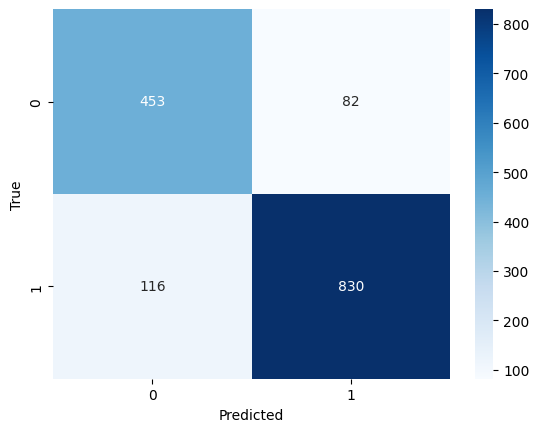

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set axis labels
plt.xlabel("Predicted")
plt.ylabel("True")

# Show the plot
plt.show()

In [175]:
y_pred

array([[0.8511371 ],
       [0.27780166],
       [0.4806624 ],
       ...,
       [0.02475166],
       [0.00243388],
       [1.        ]], dtype=float32)

In [176]:
from scipy.stats import pearsonr
pearsonr(y_pred[:,0], y_test)[0]

0.7558254156381256

In [152]:
# # to register f1 score separately in Keras (not working)

# import tensorflow as tf
# from tensorflow.keras import backend as K

# def f1_score(y_true, y_pred):
#     y_true = K.round(y_true)
#     y_pred = K.round(y_pred)

#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

#     precision = true_positives / (predicted_positives + K.epsilon())
#     recall = true_positives / (possible_positives + K.epsilon())
#     f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())

#     return f1

# # Register the custom metric
# tf.keras.metrics.f1_score = f1_score

In [155]:
# # to register f1 score separately in Keras (working)

# import tensorflow as tf
# from tensorflow.keras import backend as K
# from tensorflow.keras.metrics import Metric

# class F1Score(Metric):
#     def __init__(self, name='f1_score', **kwargs):
#         super(F1Score, self).__init__(name=name, **kwargs)
#         self.true_positives = self.add_weight(name='tp', initializer='zeros')
#         self.false_positives = self.add_weight(name='fp', initializer='zeros')
#         self.false_negatives = self.add_weight(name='fn', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_true = tf.cast(y_true, tf.float32)
#         y_pred = tf.cast(y_pred, tf.float32)

#         true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
#         false_positives = tf.reduce_sum(tf.round(tf.clip_by_value((1 - y_true) * y_pred, 0, 1)))
#         false_negatives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * (1 - y_pred), 0, 1)))

#         self.true_positives.assign_add(true_positives)
#         self.false_positives.assign_add(false_positives)
#         self.false_negatives.assign_add(false_negatives)

#     def result(self):
#         precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
#         recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
#         f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
#         return f1

# # Compile the model with 'F1Score' as the metric
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[F1Score()])

In [ ]:
# # running 7 times and getting average
# # LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

# y_pred = np.zeros(y_test.shape[0])

# for i in range(4):

#     print('Iteration ',i+1)

#     # Input for sentemb features
#     input_sentemb = Input(shape=(28,))
#     lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

#     # Input for emotions features
#     input_emotions = Input(shape=(28,))
#     reshaped_emotions = Reshape((28, 1))(input_emotions)
#     cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
#     cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

#     # input_emotions = Input(shape=(1, 28))  # Update the input shape to (1, 28)   # this doesnt work
#     # cnn_emotions = Conv1D(128, 3, activation='relu')(input_emotions)
#     # #cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

#     # input_emotions = Input(shape=(28,))
#     # cnn_emotions = Conv1D(128, 3, activation='relu')(Reshape((28, 1))(input_emotions))  # works, same as above working one
#     # cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

#     # Input for intensity features
#     input_intensity = Input(shape=(8,))

#     # Input for LIWC features
#     input_liwc = Input(shape=(119,))

#     # Concatenate the outputs of the LSTM and CNN layers
#     concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])

#     # Additional Dense layers for further processing
#     merged_output = Dense(128, activation='relu')(concatenated)
#     merged_output = Dropout(rate=0.2)(merged_output)
#     merged_output = Dense(64, activation='relu')(merged_output)
#     merged_output = Dense(32, activation='relu')(merged_output)
#     merged_output = Dropout(rate=0.2)(merged_output)

#     # Output layer
#     output = Dense(1, activation='sigmoid')(merged_output)

#     # Create the model
#     model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

#     # Compile the model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#     model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
#                         epochs=10, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

#     tmp = model.predict([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test])
#     y_pred += tmp[:,0]

#     print('Iteration ',i+1,' Done')

# y_pred = y_pred/4.0    #Final predictions
# print('Training DONE')

In [181]:
input_data = np.array([[[0.1, 0.2], [0.3, 0.4], [0.5, 0.6], [0.7, 0.8], [0.9, 1.0]],
  [[1.1, 1.2], [1.3, 1.4], [1.5, 1.6], [1.7, 1.8], [1.9, 2.0]],
  [[2.1, 2.2], [2.3, 2.4], [2.5, 2.6], [2.7, 2.8], [2.9, 3.0]]
]
)
GlobalMaxPooling1D()(input_data)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.9, 1. ],
       [1.9, 2. ],
       [2.9, 3. ]], dtype=float32)>

## CNN for sentemb, LSTM for emotions, directly give input for intensity and liwc

In [203]:
input_emotions = Input(shape=(28,))
lstm_emotions = LSTM(64)(Reshape((1, 28))(input_emotions))

input_sentemb = Input(shape=(28,))
reshaped_sentemb = Reshape((28, 1))(input_sentemb)
cnn_sentemb = Conv1D(128, 3, activation='relu')(reshaped_sentemb)
cnn_sentemb = GlobalMaxPooling1D()(cnn_sentemb)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([cnn_sentemb, lstm_emotions, input_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 4s 10ms/step - loss: 0.5376 - accuracy: 0.7262 - val_loss: 0.4658 - val_accuracy: 0.7745
Epoch 2/20
186/186 [==============================] - 1s 6ms/step - loss: 0.4315 - accuracy: 0.7941 - val_loss: 0.4311 - val_accuracy: 0.7914
Epoch 3/20
186/186 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8304 - val_loss: 0.3995 - val_accuracy: 0.8157
Epoch 4/20
186/186 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8547 - val_loss: 0.3909 - val_accuracy: 0.8292
Epoch 5/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.8815 - val_loss: 0.3994 - val_accuracy: 0.8393
Epoch 6/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2561 - accuracy: 0.8974 - val_loss: 0.3966 - val_accuracy: 0.8447
Epoch 7/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2321 - accuracy: 0.9080 - val_loss: 0.3997 - val_accuracy: 0.8501
Epoch

In [204]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.8596
Loss: 0.5702791810035706
Accuracy: 0.8595543503761292


## LSTM for sentemb, LSTM for emotions, directly give input for intensity and liwc

In [229]:
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

input_emotions = Input(shape=(28,))
lstm_emotions = LSTM(64)(Reshape((1, 28))(input_emotions))

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, lstm_emotions, input_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 4s 7ms/step - loss: 0.5261 - accuracy: 0.7355 - val_loss: 0.4457 - val_accuracy: 0.7914
Epoch 2/20
186/186 [==============================] - 1s 5ms/step - loss: 0.4038 - accuracy: 0.8197 - val_loss: 0.3746 - val_accuracy: 0.8258
Epoch 3/20
186/186 [==============================] - 1s 6ms/step - loss: 0.3208 - accuracy: 0.8597 - val_loss: 0.3511 - val_accuracy: 0.8413
Epoch 4/20
186/186 [==============================] - 1s 6ms/step - loss: 0.2812 - accuracy: 0.8805 - val_loss: 0.3287 - val_accuracy: 0.8542
Epoch 5/20
186/186 [==============================] - 1s 5ms/step - loss: 0.2560 - accuracy: 0.8991 - val_loss: 0.3386 - val_accuracy: 0.8481
Epoch 6/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2262 - accuracy: 0.9100 - val_loss: 0.3445 - val_accuracy: 0.8589
Epoch 7/20
186/186 [==============================] - 1s 3ms/step - loss: 0.2054 - accuracy: 0.9183 - val_loss: 0.3487 - val_accuracy: 0.8609
Epoch 

In [230]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8643
Loss: 0.574522078037262
Accuracy: 0.8642808794975281


## CNN for sentemb, CNN for emotions, directly give input for intensity and liwc

In [227]:
input_sentemb = Input(shape=(28,))
reshaped_sentemb = Reshape((28, 1))(input_sentemb)
cnn_sentemb = Conv1D(128, 3, activation='relu')(reshaped_sentemb)
cnn_sentemb = GlobalMaxPooling1D()(cnn_sentemb)

input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([cnn_sentemb, cnn_emotions, input_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 2s 5ms/step - loss: 0.5283 - accuracy: 0.7286 - val_loss: 0.4537 - val_accuracy: 0.7785
Epoch 2/20
186/186 [==============================] - 1s 4ms/step - loss: 0.4256 - accuracy: 0.8033 - val_loss: 0.4282 - val_accuracy: 0.8042
Epoch 3/20
186/186 [==============================] - 1s 4ms/step - loss: 0.3694 - accuracy: 0.8391 - val_loss: 0.4180 - val_accuracy: 0.8028
Epoch 4/20
186/186 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8547 - val_loss: 0.3938 - val_accuracy: 0.8305
Epoch 5/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.8812 - val_loss: 0.3748 - val_accuracy: 0.8488
Epoch 6/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2460 - accuracy: 0.9001 - val_loss: 0.3450 - val_accuracy: 0.8575
Epoch 7/20
186/186 [==============================] - 1s 4ms/step - loss: 0.2223 - accuracy: 0.9124 - val_loss: 0.3758 - val_accuracy: 0.8508
Epoch 

In [228]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 0.5323 - accuracy: 0.8650
Loss: 0.5323306322097778
Accuracy: 0.8649561405181885


## LSTM for sentemb, CNN for emotions, LSTM intensity and CNN liwc

In [90]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(64)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))
reshaped_liwc = Reshape((119, 1))(input_liwc)
cnn_liwc = Conv1D(128, 3, activation='relu')(reshaped_liwc)
cnn_liwc = GlobalMaxPooling1D()(cnn_liwc)

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, lstm_intensity, cnn_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=10, batch_size=64, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/10
93/93 [==============================] - 9s 19ms/step - loss: 0.6490 - accuracy: 0.6345 - val_loss: 0.5918 - val_accuracy: 0.6597
Epoch 2/10
93/93 [==============================] - 1s 9ms/step - loss: 0.5297 - accuracy: 0.7270 - val_loss: 0.4704 - val_accuracy: 0.7502
Epoch 3/10
93/93 [==============================] - 1s 10ms/step - loss: 0.4605 - accuracy: 0.7687 - val_loss: 0.4091 - val_accuracy: 0.7920
Epoch 4/10
93/93 [==============================] - 1s 10ms/step - loss: 0.3901 - accuracy: 0.8275 - val_loss: 0.3839 - val_accuracy: 0.8265
Epoch 5/10
93/93 [==============================] - 1s 10ms/step - loss: 0.3639 - accuracy: 0.8412 - val_loss: 0.3344 - val_accuracy: 0.8494
Epoch 6/10
93/93 [==============================] - 1s 13ms/step - loss: 0.3460 - accuracy: 0.8545 - val_loss: 0.3861 - val_accuracy: 0.8386
Epoch 7/10
93/93 [==============================] - 1s 15ms/step - loss: 0.3441 - accuracy: 0.8542 - val_loss: 0.3186 - val_accuracy: 0.8589
Epoch 8/10
93/

In [91]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 4ms/step - loss: 0.3134 - accuracy: 0.8650
Loss: 0.31335359811782837
Accuracy: 0.8649561405181885


## LSTM for sentemb, CNN for emotions, CNN intensity and LSTM liwc

In [60]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
reshaped_intensity = Reshape((8, 1))(input_intensity)
cnn_intensity = Conv1D(128, 3, activation='relu')(reshaped_intensity)
cnn_intensity = GlobalMaxPooling1D()(cnn_intensity)

# Input for LIWC features
input_liwc = Input(shape=(119,))
lstm_liwc = LSTM(64)(Reshape((1, 119))(input_liwc))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, cnn_intensity, lstm_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=64, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
93/93 [==============================] - 11s 29ms/step - loss: 0.5389 - accuracy: 0.7164 - val_loss: 0.4391 - val_accuracy: 0.7880
Epoch 2/20
93/93 [==============================] - 1s 10ms/step - loss: 0.3741 - accuracy: 0.8315 - val_loss: 0.3564 - val_accuracy: 0.8440
Epoch 3/20
93/93 [==============================] - 1s 9ms/step - loss: 0.2967 - accuracy: 0.8736 - val_loss: 0.3473 - val_accuracy: 0.8481
Epoch 4/20
93/93 [==============================] - 1s 10ms/step - loss: 0.2456 - accuracy: 0.9018 - val_loss: 0.3377 - val_accuracy: 0.8589
Epoch 5/20
93/93 [==============================] - 1s 10ms/step - loss: 0.2030 - accuracy: 0.9217 - val_loss: 0.3689 - val_accuracy: 0.8535
Epoch 6/20
93/93 [==============================] - 1s 10ms/step - loss: 0.1778 - accuracy: 0.9350 - val_loss: 0.3885 - val_accuracy: 0.8582
Epoch 7/20
93/93 [==============================] - 1s 9ms/step - loss: 0.1365 - accuracy: 0.9504 - val_loss: 0.4115 - val_accuracy: 0.8609
Epoch 8/20
93/

In [61]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 4ms/step - loss: 1.0896 - accuracy: 0.8508
Loss: 1.0895622968673706
Accuracy: 0.8507764935493469


## LSTM for sentemb, CNN for emotions, LSTM intensity and LSTM liwc

In [74]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(64)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))
lstm_liwc = LSTM(64)(Reshape((1, 119))(input_liwc))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, lstm_intensity, lstm_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 13s 25ms/step - loss: 0.5055 - accuracy: 0.7348 - val_loss: 0.4016 - val_accuracy: 0.8204
Epoch 2/20
186/186 [==============================] - 2s 11ms/step - loss: 0.3422 - accuracy: 0.8491 - val_loss: 0.4189 - val_accuracy: 0.8015
Epoch 3/20
186/186 [==============================] - 5s 28ms/step - loss: 0.2646 - accuracy: 0.8891 - val_loss: 0.3435 - val_accuracy: 0.8501
Epoch 4/20
186/186 [==============================] - 3s 18ms/step - loss: 0.2160 - accuracy: 0.9127 - val_loss: 0.3561 - val_accuracy: 0.8609
Epoch 5/20
186/186 [==============================] - 3s 18ms/step - loss: 0.1756 - accuracy: 0.9316 - val_loss: 0.4207 - val_accuracy: 0.8710
Epoch 6/20
186/186 [==============================] - 2s 11ms/step - loss: 0.1452 - accuracy: 0.9453 - val_loss: 0.4057 - val_accuracy: 0.8710
Epoch 7/20
186/186 [==============================] - 3s 18ms/step - loss: 0.1138 - accuracy: 0.9578 - val_loss: 0.4939 - val_accuracy: 0.856

In [75]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 4ms/step - loss: 1.0444 - accuracy: 0.8467
Loss: 1.044447660446167
Accuracy: 0.8467251658439636


## LSTM for sentemb, CNN for emotions, CNN intensity and CNN liwc

In [82]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
reshaped_intensity = Reshape((8, 1))(input_intensity)
cnn_intensity = Conv1D(128, 3, activation='relu')(reshaped_intensity)
cnn_intensity = GlobalMaxPooling1D()(cnn_intensity)

# Input for LIWC features
input_liwc = Input(shape=(119,))
reshaped_liwc = Reshape((119, 1))(input_liwc)
cnn_liwc = Conv1D(128, 3, activation='relu')(reshaped_liwc)
cnn_liwc = GlobalMaxPooling1D()(cnn_liwc)

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, cnn_intensity, cnn_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=64, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
93/93 [==============================] - 7s 18ms/step - loss: 0.6522 - accuracy: 0.6210 - val_loss: 0.6377 - val_accuracy: 0.6793
Epoch 2/20
93/93 [==============================] - 1s 13ms/step - loss: 0.5302 - accuracy: 0.7289 - val_loss: 0.4869 - val_accuracy: 0.7441
Epoch 3/20
93/93 [==============================] - 1s 13ms/step - loss: 0.4736 - accuracy: 0.7687 - val_loss: 0.4336 - val_accuracy: 0.7589
Epoch 4/20
93/93 [==============================] - 1s 15ms/step - loss: 0.4219 - accuracy: 0.8030 - val_loss: 0.4047 - val_accuracy: 0.7839
Epoch 5/20
93/93 [==============================] - 1s 9ms/step - loss: 0.3813 - accuracy: 0.8248 - val_loss: 0.3491 - val_accuracy: 0.8332
Epoch 6/20
93/93 [==============================] - 1s 9ms/step - loss: 0.3573 - accuracy: 0.8467 - val_loss: 0.3373 - val_accuracy: 0.8515
Epoch 7/20
93/93 [==============================] - 1s 9ms/step - loss: 0.3407 - accuracy: 0.8508 - val_loss: 0.3317 - val_accuracy: 0.8596
Epoch 8/20
93/93

In [83]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8690
Loss: 0.3031615912914276
Accuracy: 0.869007408618927


In [58]:
# LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])   # concatenated.shape = TensorShape([None, 319])

# Additional Dense layers for further processing

reshaped_concatenated = Reshape((319, 1))(concatenated)
merged_output = Conv1D(128, 3, activation='relu')(reshaped_concatenated)
merged_output = GlobalMaxPooling1D()(merged_output)

merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

In [59]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 17s 14ms/step - loss: 0.5341 - accuracy: 0.7245 - val_loss: 0.4735 - val_accuracy: 0.7643
Epoch 2/20
186/186 [==============================] - 3s 15ms/step - loss: 0.4222 - accuracy: 0.8054 - val_loss: 0.4196 - val_accuracy: 0.8082
Epoch 3/20
186/186 [==============================] - 2s 12ms/step - loss: 0.3444 - accuracy: 0.8442 - val_loss: 0.3726 - val_accuracy: 0.8400
Epoch 4/20
186/186 [==============================] - 2s 11ms/step - loss: 0.2933 - accuracy: 0.8756 - val_loss: 0.3385 - val_accuracy: 0.8501
Epoch 5/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2631 - accuracy: 0.8898 - val_loss: 0.3741 - val_accuracy: 0.8447
Epoch 6/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2370 - accuracy: 0.9014 - val_loss: 0.3224 - val_accuracy: 0.8677
Epoch 7/20
186/186 [==============================] - 2s 11ms/step - loss: 0.2089 - accuracy: 0.9168 - val_loss: 0.3331 - val_accuracy: 0.865

In [60]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.8677
Loss: 0.6063438653945923
Accuracy: 0.8676570057868958


In [56]:
# to check shape of concatenated tensor

input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])

In [57]:
concatenated.shape

TensorShape([None, 319])

## LSTM sentemb, CNN emotions, LSTM intensity, liwc directly input

In [71]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(64)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(64)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, lstm_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=64, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
93/93 [==============================] - 11s 32ms/step - loss: 0.5374 - accuracy: 0.7220 - val_loss: 0.4670 - val_accuracy: 0.7569
Epoch 2/20
93/93 [==============================] - 2s 17ms/step - loss: 0.4303 - accuracy: 0.8013 - val_loss: 0.4096 - val_accuracy: 0.8130
Epoch 3/20
93/93 [==============================] - 2s 17ms/step - loss: 0.3668 - accuracy: 0.8358 - val_loss: 0.3727 - val_accuracy: 0.8332
Epoch 4/20
93/93 [==============================] - 2s 23ms/step - loss: 0.3178 - accuracy: 0.8602 - val_loss: 0.3572 - val_accuracy: 0.8528
Epoch 5/20
93/93 [==============================] - 2s 22ms/step - loss: 0.2835 - accuracy: 0.8822 - val_loss: 0.3443 - val_accuracy: 0.8555
Epoch 6/20
93/93 [==============================] - 2s 24ms/step - loss: 0.2510 - accuracy: 0.9001 - val_loss: 0.3342 - val_accuracy: 0.8636
Epoch 7/20
93/93 [==============================] - 2s 23ms/step - loss: 0.2216 - accuracy: 0.9136 - val_loss: 0.3345 - val_accuracy: 0.8602
Epoch 8/20
9

In [72]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 5ms/step - loss: 0.4928 - accuracy: 0.8704
Loss: 0.4928414821624756
Accuracy: 0.870357871055603


20 32 - 0.871/0.544 <br>
20 64 - 0.870/0.492

## LSTM (with lstm layer having 32 neurons, not 64) sentemb, CNN emotions, LSTM(32) intensity, liwc directly input

In [73]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(32)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(32)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, lstm_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 15s 33ms/step - loss: 0.5291 - accuracy: 0.7357 - val_loss: 0.4566 - val_accuracy: 0.7738
Epoch 2/20
186/186 [==============================] - 3s 18ms/step - loss: 0.4060 - accuracy: 0.8131 - val_loss: 0.3979 - val_accuracy: 0.8177
Epoch 3/20
186/186 [==============================] - 3s 19ms/step - loss: 0.3423 - accuracy: 0.8520 - val_loss: 0.3550 - val_accuracy: 0.8393
Epoch 4/20
186/186 [==============================] - 4s 22ms/step - loss: 0.2941 - accuracy: 0.8732 - val_loss: 0.3361 - val_accuracy: 0.8636
Epoch 5/20
186/186 [==============================] - 3s 17ms/step - loss: 0.2601 - accuracy: 0.8948 - val_loss: 0.3464 - val_accuracy: 0.8508
Epoch 6/20
186/186 [==============================] - 3s 17ms/step - loss: 0.2335 - accuracy: 0.9060 - val_loss: 0.3945 - val_accuracy: 0.8427
Epoch 7/20
186/186 [==============================] - 3s 18ms/step - loss: 0.2186 - accuracy: 0.9112 - val_loss: 0.3520 - val_accuracy: 0.856

In [74]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 7ms/step - loss: 0.4959 - accuracy: 0.8751
Loss: 0.49585771560668945
Accuracy: 0.875084400177002


20 32 - 0.875/0.495

## LSTM (32) for sentemb, CNN for emotions, directly give input for intensity and liwc

In [75]:
# LSTM for sentemb, CNN for emotions, directly give input for intensity and liwc

# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(32)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, input_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 12s 20ms/step - loss: 0.5505 - accuracy: 0.7154 - val_loss: 0.4533 - val_accuracy: 0.7799
Epoch 2/20
186/186 [==============================] - 3s 17ms/step - loss: 0.4254 - accuracy: 0.8017 - val_loss: 0.4218 - val_accuracy: 0.7927
Epoch 3/20
186/186 [==============================] - 3s 14ms/step - loss: 0.3548 - accuracy: 0.8332 - val_loss: 0.3765 - val_accuracy: 0.8319
Epoch 4/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2959 - accuracy: 0.8778 - val_loss: 0.3502 - val_accuracy: 0.8400
Epoch 5/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2718 - accuracy: 0.8867 - val_loss: 0.3546 - val_accuracy: 0.8460
Epoch 6/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2353 - accuracy: 0.9051 - val_loss: 0.3485 - val_accuracy: 0.8569
Epoch 7/20
186/186 [==============================] - 2s 10ms/step - loss: 0.2142 - accuracy: 0.9141 - val_loss: 0.3567 - val_accuracy: 0.865

In [76]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 6ms/step - loss: 0.5010 - accuracy: 0.8623
Loss: 0.5009584426879883
Accuracy: 0.8622552156448364


20 32 - 0.862/0.500

## LSTM (16) sentemb, CNN emotions, LSTM(16) intensity, liwc directly input

In [81]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(16)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(16)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_emotions, lstm_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 10s 17ms/step - loss: 0.5330 - accuracy: 0.7270 - val_loss: 0.4512 - val_accuracy: 0.7772
Epoch 2/20
186/186 [==============================] - 2s 11ms/step - loss: 0.4134 - accuracy: 0.8148 - val_loss: 0.4230 - val_accuracy: 0.8015
Epoch 3/20
186/186 [==============================] - 2s 11ms/step - loss: 0.3520 - accuracy: 0.8450 - val_loss: 0.3765 - val_accuracy: 0.8346
Epoch 4/20
186/186 [==============================] - 3s 17ms/step - loss: 0.2990 - accuracy: 0.8700 - val_loss: 0.3547 - val_accuracy: 0.8413
Epoch 5/20
186/186 [==============================] - 2s 13ms/step - loss: 0.2649 - accuracy: 0.8861 - val_loss: 0.3465 - val_accuracy: 0.8467
Epoch 6/20
186/186 [==============================] - 2s 12ms/step - loss: 0.2389 - accuracy: 0.9006 - val_loss: 0.3677 - val_accuracy: 0.8589
Epoch 7/20
186/186 [==============================] - 2s 12ms/step - loss: 0.2133 - accuracy: 0.9148 - val_loss: 0.3670 - val_accuracy: 0.856

In [82]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 5ms/step - loss: 0.5084 - accuracy: 0.8663
Loss: 0.508393406867981
Accuracy: 0.8663065433502197


20 32 - 0.866/0.504

## LSTM (32) sentemb, CNN + LSTM (32) emotions, LSTM(32) intensity, liwc directly input

In [66]:
# Input for sentemb features
input_sentemb = Input(shape=(28,))
lstm_sentemb = LSTM(32)(Reshape((1, 28))(input_sentemb))

# Input for emotions features
input_emotions = Input(shape=(28,))
reshaped_emotions = Reshape((28, 1))(input_emotions)
cnn_emotions = Conv1D(128, 3, activation='relu')(reshaped_emotions)
cnn_emotions = GlobalMaxPooling1D()(cnn_emotions)
# + LSTM
cnn_lstm_emotions = LSTM(32)(Reshape((1, 128))(cnn_emotions))  # cnn_emotions returns length 128

# Input for intensity features
input_intensity = Input(shape=(8,))
lstm_intensity = LSTM(32)(Reshape((1, 8))(input_intensity))

# Input for LIWC features
input_liwc = Input(shape=(119,))

# Concatenate the outputs of the LSTM and CNN layers
concatenated = Concatenate()([lstm_sentemb, cnn_lstm_emotions, lstm_intensity, input_liwc])

# Additional Dense layers for further processing
merged_output = Dense(128, activation='relu')(concatenated)
merged_output = Dropout(rate=0.2)(merged_output)
merged_output = Dense(64, activation='relu')(merged_output)
merged_output = Dense(32, activation='relu')(merged_output)
merged_output = Dropout(rate=0.2)(merged_output)

# Output layer
output = Dense(1, activation='sigmoid')(merged_output)

# Create the model
model = Model(inputs=[input_sentemb, input_emotions, input_intensity, input_liwc], outputs=output)  # note that here it should all be input tensors, not lstm_sentemb or cnn_emotions

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit([X_sentemb_train, X_emotions_train, X_intensity_train, X_liwc_train], y_train,
                    epochs=20, batch_size=32, validation_data=([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test))

Epoch 1/20
186/186 [==============================] - 14s 23ms/step - loss: 0.5459 - accuracy: 0.7120 - val_loss: 0.4658 - val_accuracy: 0.7664
Epoch 2/20
186/186 [==============================] - 3s 15ms/step - loss: 0.4334 - accuracy: 0.7961 - val_loss: 0.4060 - val_accuracy: 0.8170
Epoch 3/20
186/186 [==============================] - 3s 15ms/step - loss: 0.3528 - accuracy: 0.8430 - val_loss: 0.3802 - val_accuracy: 0.8332
Epoch 4/20
186/186 [==============================] - 4s 20ms/step - loss: 0.3134 - accuracy: 0.8673 - val_loss: 0.3503 - val_accuracy: 0.8413
Epoch 5/20
186/186 [==============================] - 3s 18ms/step - loss: 0.2632 - accuracy: 0.8931 - val_loss: 0.3516 - val_accuracy: 0.8609
Epoch 6/20
186/186 [==============================] - 3s 15ms/step - loss: 0.2425 - accuracy: 0.9016 - val_loss: 0.3545 - val_accuracy: 0.8555
Epoch 7/20
186/186 [==============================] - 3s 15ms/step - loss: 0.2250 - accuracy: 0.9094 - val_loss: 0.3546 - val_accuracy: 0.857

In [67]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_sentemb_test, X_emotions_test, X_intensity_test, X_liwc_test], y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

47/47 [==============================] - 0s 6ms/step - loss: 0.4829 - accuracy: 0.8616
Loss: 0.48293250799179077
Accuracy: 0.8615800142288208


20 32 - 0.861/0.48